<a href="https://colab.research.google.com/github/nekhaasen/Projects/blob/main/AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

LOADING THE DATASET

In [3]:
df = pd.read_csv('Airbnb_Open_Data.csv')
print (df.head())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

/tmp/ipython-input-3193498809.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


PRINTING DATA TYPES OF THE COLUMNS

In [4]:
print(df.dtypes)

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

DATA CLEANING AND PREPARAION

In [5]:
df = df.drop(columns=['country', 'country code', 'host id'])
print(df.head())

        id                                              NAME  \
0  1001254                Clean & quiet apt home by the park   
1  1002102                             Skylit Midtown Castle   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3  1002755                                               NaN   
4  1003689  Entire Apt: Spacious Studio/Loft by central park   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long instant_bookable cancellation_policy  ... service fee  \
0  40.64749 -73.97237            False              strict  ...       $193    
1  40.75362 -73.98377   

In [6]:
missing_counts = df.isna().sum()

In [7]:
missing_counts = missing_counts[missing_counts > 0].sort_values()


In [8]:
print("Missing values count (ascending order):")
print(missing_counts)

Missing values count (ascending order):
long                                  8
lat                                   8
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  57
instant_bookable                     86
price                               141
service fee                         141
calculated host listings count      145
number of reviews                   152
Construction year                   191
NAME                                203
review rate number                  214
host_identity_verified              217
host name                           248
minimum nights                      364
availability 365                    433
reviews per month                 10694
last review                       10708
house_rules                       28314
license                           60907
dtype: int64


REPLACING MISSING VALUES

In [9]:
df['long'] = df['long'].interpolate()

In [10]:
df['lat'] = df['lat'].interpolate()

In [11]:
df["service fee"] = df["service fee"].str.replace("$","")
df["price"] = df["price"].str.replace("$","")

In [12]:
df['service fee'] = df['service fee'].interpolate()

/tmp/ipython-input-405133731.py:1: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['service fee'] = df['service fee'].interpolate()


In [13]:
df= df.dropna(subset = ["price"])

In [14]:
df["price"].unique()

array(['966 ', '142 ', '620 ', ..., '1,184 ', '905 ', '309 '],
      dtype=object)

In [15]:
df["price"] = df["price"].replace(' ', '')
df["price"] = df["price"].str.replace(',','')
df["price"] = df["price"].astype(float)

In [16]:
city = {"brookln":"Brooklyn",
               "manhatan":"Manhattan"}

In [17]:
df["neighbourhood group"] = df["neighbourhood group"].replace(city)

In [18]:
df["neighbourhood group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
df = df.dropna(subset=["neighbourhood group"])

In [20]:
df["neighbourhood group"].isna().sum()

np.int64(0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60739 entries, 0 to 60906
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              60739 non-null  int64  
 1   NAME                            60541 non-null  object 
 2   host_identity_verified          60534 non-null  object 
 3   host name                       60492 non-null  object 
 4   neighbourhood group             60739 non-null  object 
 5   neighbourhood                   60724 non-null  object 
 6   lat                             60739 non-null  float64
 7   long                            60739 non-null  float64
 8   instant_bookable                60659 non-null  object 
 9   cancellation_policy             60688 non-null  object 
 10  room type                       60739 non-null  object 
 11  Construction year               60558 non-null  float64
 12  price                           60739

In [22]:
df["service fee"] = df["service fee"].astype(float)

In [23]:
df["license"].isna().sum()
df = df.drop("license",axis = 1)

In [24]:
df.loc[df["availability 365"] > 365, "availability 365"] = 365

In [25]:
df.loc[df["availability 365"]<0, "availability 365"] = 0

In [26]:
df["reviews per month"].isna().sum()

np.int64(10669)

In [27]:
df["last review"].isna().sum()

np.int64(10682)

In [28]:
df.loc[df["number of reviews"] == 0.0, "review rate number"] = 0

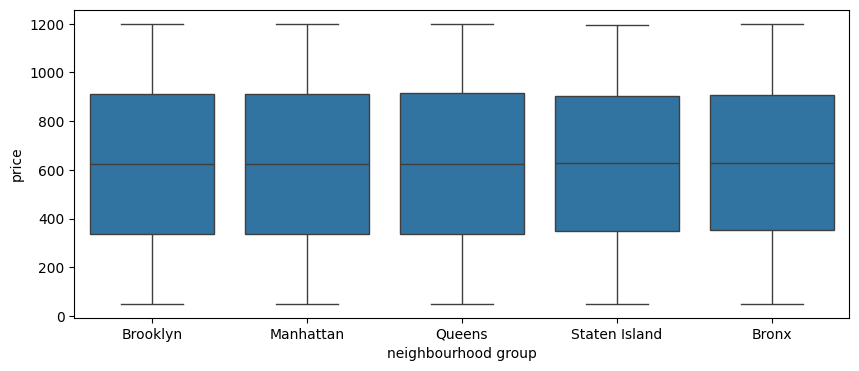

In [29]:
plt.subplots(1,1,figsize = (10,4))
sns.boxplot(data = df, x = "neighbourhood group",y ="price")
plt.show()

In [30]:
numerical_cols = ['lat', 'long', 'Construction year', 'minimum nights', 'number of reviews',
                  'review rate number', 'calculated host listings count', 'availability 365',
                  'price', 'service fee','reviews per month']
for col in numerical_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [31]:
def clean_currency(series):
    return series.astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().replace('nan', np.nan).astype(float)

df['price'] = clean_currency(df['price'])
df['service fee'] = clean_currency(df['service fee'])

In [32]:
df['last review'] = pd.to_datetime(df['last review'], format='%m/%d/%Y', errors='coerce')

In [33]:
numerical_cols = ['lat', 'long', 'Construction year', 'minimum nights', 'number of reviews',
                  'review rate number', 'calculated host listings count', 'availability 365',
                  'price', 'service fee','reviews per month']
for col in numerical_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60739 entries, 0 to 60906
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              60739 non-null  int64         
 1   NAME                            60541 non-null  object        
 2   host_identity_verified          60534 non-null  object        
 3   host name                       60492 non-null  object        
 4   neighbourhood group             60739 non-null  object        
 5   neighbourhood                   60724 non-null  object        
 6   lat                             60739 non-null  float64       
 7   long                            60739 non-null  float64       
 8   instant_bookable                60659 non-null  object        
 9   cancellation_policy             60688 non-null  object        
 10  room type                       60739 non-null  object        
 11  Constru

In [35]:
group_review = df.groupby("neighbourhood group")["number of reviews"].sum().sort_values(ascending=False)

In [36]:
df.head()

,id,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,...,620.0,124.0,3.0,0.0,NaT,0.93,0.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,...,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [37]:
df['NAME'] = df['NAME'].fillna('No Name Provided')
df['host name'] = df['host name'].fillna('No Host Name')
df['house_rules'] = df['house_rules'].fillna('No house rules specified')

In [38]:
categorical_cols_to_fill = [
    'host_identity_verified',
    'neighbourhood group',
    'neighbourhood',
    'instant_bookable',
    'cancellation_policy'
]

In [39]:
for col in categorical_cols_to_fill:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [40]:
condition = df['number of reviews'] == 0
df.loc[condition,[ 'reviews per month', 'review rate number']] = 0

In [41]:
condition = df['number of reviews'] == 0
df.loc[condition, 'last review'] = np.nan

DATA TRANSFORMATION

In [42]:
int_cols = [
    'minimum nights',
    'number of reviews',
    'Construction year',
    'calculated host listings count',
    'availability 365',
    'review rate number'
]

In [43]:
for col in int_cols:
  df[col] = df[col].round(0).astype('int64')
  df[col] = df[col].fillna(0).round(0).astype('int64')

In [44]:
condition_to_fill = (df['number of reviews'] > 0) & (df['last review'].isna())

In [45]:
last_review_mode = df['last review'].mode()[0]

In [46]:
num_filled = condition_to_fill.sum()
df.loc[condition_to_fill, 'last review'] = last_review_mode

In [47]:
print(df.info)

<bound method DataFrame.info of              id                                               NAME  \
0       1001254                 Clean & quiet apt home by the park   
1       1002102                              Skylit Midtown Castle   
2       1002403                THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                   No Name Provided   
4       1003689   Entire Apt: Spacious Studio/Loft by central park   
...         ...                                                ...   
60902  34637511  Newly renovated two bedroom apartment close to...   
60903  34638063          UNTITLED at Freeman - Bunk Bed Studio 501   
60904  34638615           Spacious 1 bedroom with patio, roof, gym   
60905  34639168               *Your Home Away From Home - Bedstuy*   
60906  34639720  Shoreham Hotel - Modern Studio right in the he...   

      host_identity_verified host name neighbourhood group  \
0                unconfirmed  Madaline            Brooklyn   
1  

In [48]:
print(df[numerical_cols].describe())

               lat          long  Construction year  minimum nights  \
count  60739.00000  60739.000000       60739.000000    60739.000000   
mean      40.72807    -73.949636        2012.488269        7.353891   
std        0.05567      0.049699           5.758304       35.706589   
min       40.49979    -74.249840        2003.000000    -1223.000000   
25%       40.68869    -73.982935        2008.000000        1.000000   
50%       40.72235    -73.954620        2012.000000        2.000000   
75%       40.76276    -73.932060        2017.000000        5.000000   
max       40.91685    -73.705220        2022.000000     5645.000000   

       number of reviews  review rate number  calculated host listings count  \
count       60739.000000        60739.000000                    60739.000000   
mean           27.963747            2.724641                        7.973691   
std            52.459117            1.701050                       33.297149   
min             0.000000            0.00

In [49]:
valid_min_nights_median = df.loc[df['minimum nights'] > 0, 'minimum nights'].median()

In [50]:
df.loc[df['minimum nights'] <= 0, 'minimum nights'] = valid_min_nights_median
df.loc[df['minimum nights'] > 365, 'minimum nights'] = 365

In [51]:
df.loc[df['availability 365'] < 0, 'availability 365'] = 0
df.loc[df['availability 365'] > 365, 'availability 365'] = 365

In [52]:
print("Summary statistics for corrected numerical columns:")
corrected_cols = ['minimum nights', 'availability 365']
print(df[corrected_cols].describe())

Summary statistics for corrected numerical columns:
       minimum nights  availability 365
count    60739.000000      60739.000000
mean         7.125224        153.670607
std         17.683428        131.664688
min          1.000000          0.000000
25%          1.000000         22.000000
50%          2.000000        130.000000
75%          5.000000        281.000000
max        365.000000        365.000000


In [53]:
df = df.drop_duplicates()

In [54]:
valid_min_nights_median = df.loc[df['minimum nights'] > 0, 'minimum nights'].median()

In [55]:
df.loc[df['minimum nights'] <= 0, 'minimum nights'] = valid_min_nights_median
df.loc[df['minimum nights'] > 365, 'minimum nights'] = 365

In [56]:
df.loc[df['availability 365'] < 0, 'availability 365'] = 0
df.loc[df['availability 365'] > 365, 'availability 365'] = 365

In [57]:
print("Summary statistics for corrected numerical columns:")
corrected_cols = ['minimum nights', 'availability 365']
print(df[corrected_cols].describe())

Summary statistics for corrected numerical columns:
       minimum nights  availability 365
count    60739.000000      60739.000000
mean         7.125224        153.670607
std         17.683428        131.664688
min          1.000000          0.000000
25%          1.000000         22.000000
50%          2.000000        130.000000
75%          5.000000        281.000000
max        365.000000        365.000000


In [58]:
df.to_csv("Airbnb_Open_Data_Cleaned.csv", index=False)
print("Data has been cleaned and validated")

Data has been cleaned and validated


In [59]:
df = df.drop_duplicates()

In [60]:
pc = df["price"].copy()

Q1 = pc.quantile(0.25)
Q3 = pc.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df.loc[:, "price"] = pc.clip(lower, upper)

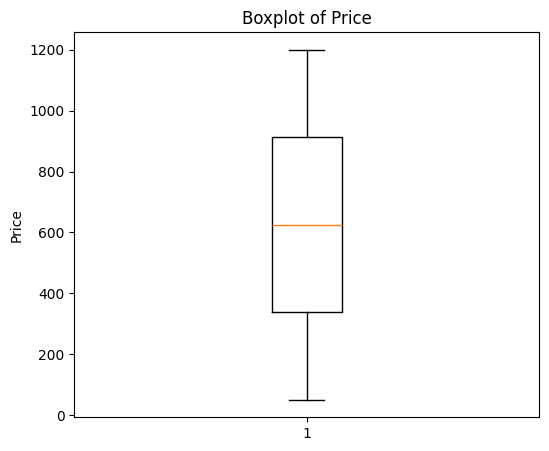

In [61]:
plt.figure(figsize=(6,5))
plt.boxplot(df["price"])
plt.ylabel("Price")
plt.title("Boxplot of Price")
plt.show()

In [62]:
if "lat" in df.columns and "long" in df.columns:
    df = df[df["lat"].between(-90, 90)]
    df = df[df["long"].between(-180, 180)]

    print("Geo-cleaning applied. Remaining rows:", df.shape[0])
else:
    print("Latitude/Longitude not found → skipping geo-cleaning")

Geo-cleaning applied. Remaining rows: 60739


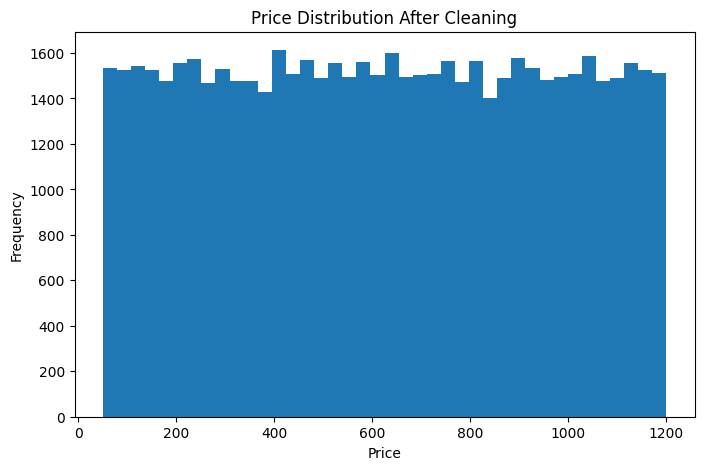

In [63]:
plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=40)
plt.title("Price Distribution After Cleaning")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

<Figure size 1000x600 with 0 Axes>

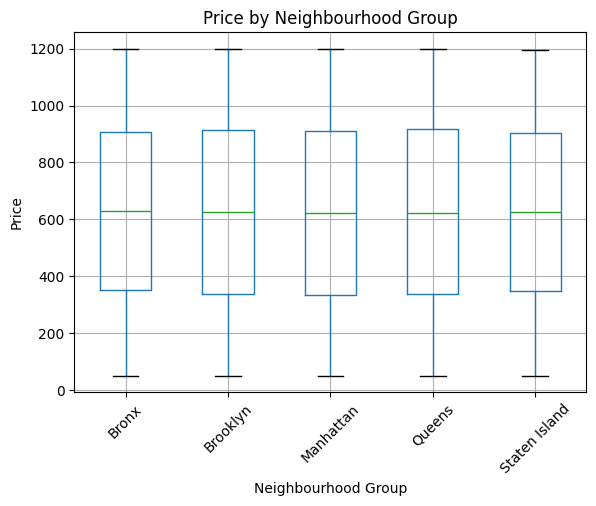

In [64]:
if "neighbourhood group" in df.columns:
    plt.figure(figsize=(10,6))
    df.boxplot(column="price", by="neighbourhood group")
    plt.title("Price by Neighbourhood Group")
    plt.suptitle("")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

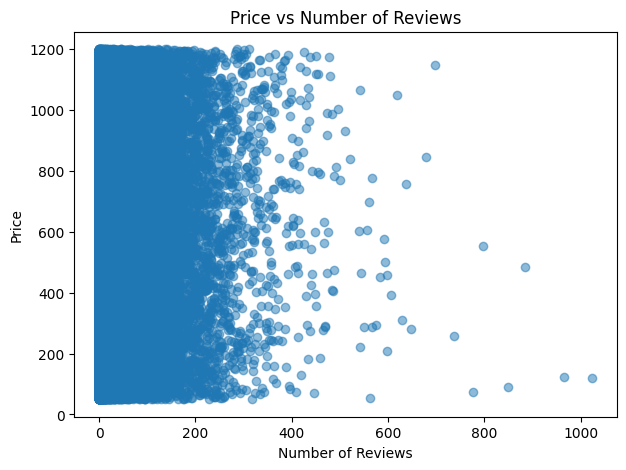

In [65]:
if "number of reviews" in df.columns:
    plt.figure(figsize=(7,5))
    plt.scatter(df["number of reviews"], df["price"], alpha=0.5)
    plt.xlabel("Number of Reviews")
    plt.ylabel("Price")
    plt.title("Price vs Number of Reviews")
    plt.show()

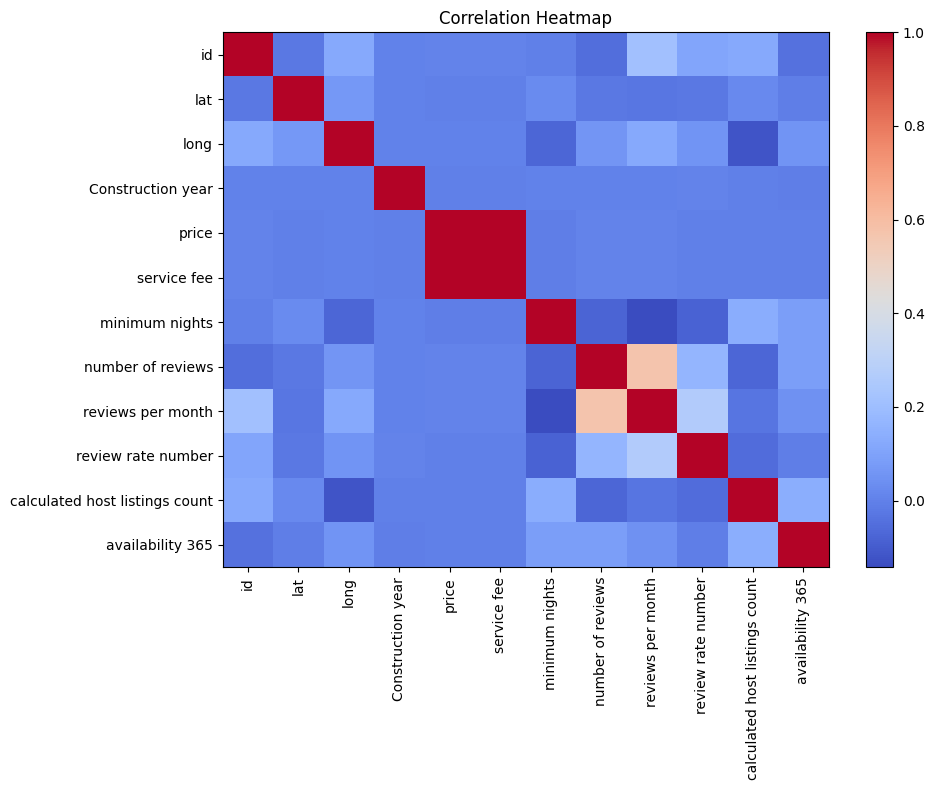

In [66]:
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
plt.imshow(num_df.corr(), cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [67]:
pd.DataFrame(df['room type']).value_counts()

,count
room type,
Entire home/apt,32513
Private room,26854
Shared room,1323
Hotel room,49


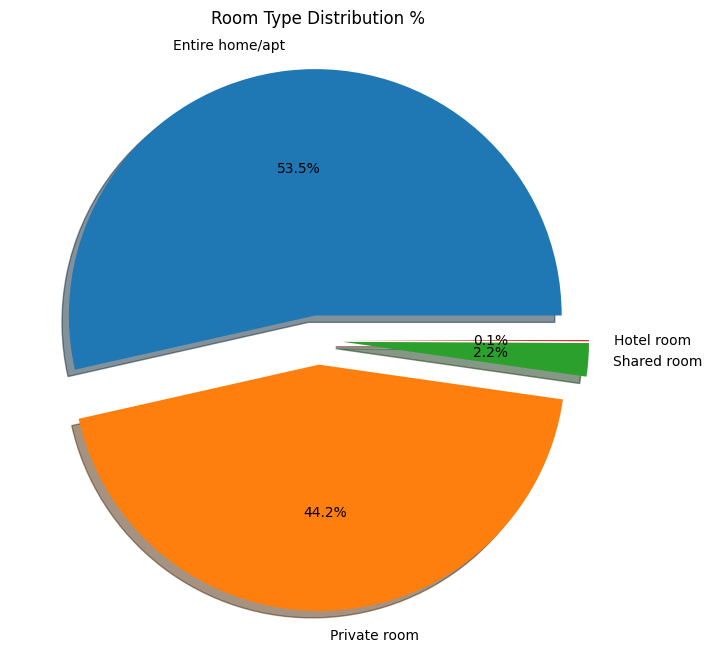

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df['room type'].value_counts().plot.pie(
    ax=ax,
    explode=[0.1] * df['room type'].nunique(),
    autopct='%1.1f%%',
    shadow=True
)
ax.set_title("Room Type Distribution %")
ax.set_ylabel('')
plt.show()

In [69]:
pd.DataFrame(df['neighbourhood group']).value_counts()

,count
neighbourhood group,
Manhattan,26017
Brooklyn,24662
Queens,7889
Bronx,1625
Staten Island,546


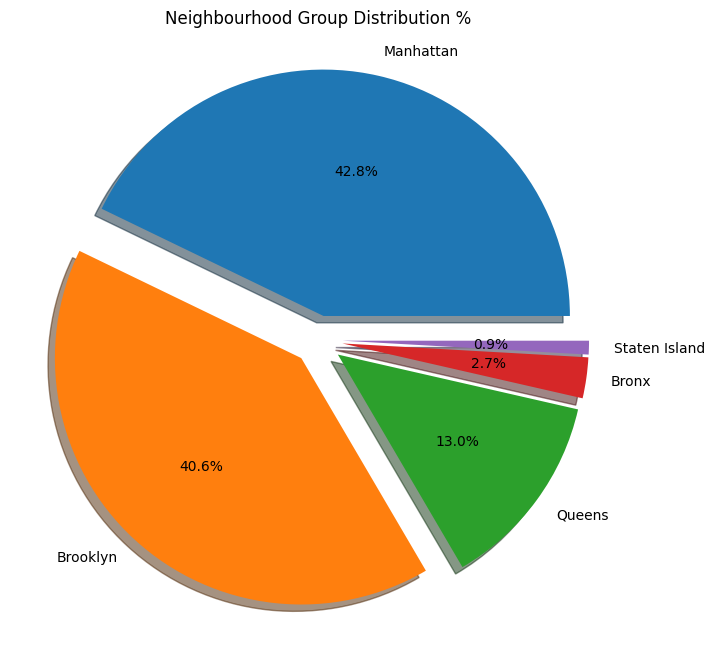

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df['neighbourhood group'].value_counts().plot.pie(
    ax=ax,
    explode=[0.1] * df['neighbourhood group'].nunique(),
    autopct='%1.1f%%',
    shadow=True
)

ax.set_title("Neighbourhood Group Distribution %")
ax.set_ylabel('')
plt.show()

In [71]:
pd.DataFrame(df['host_identity_verified']).value_counts()

,count
host_identity_verified,
unconfirmed,30308
verified,30226
Unknown,205


(array([0, 1, 2]),
 [Text(0, 0, 'unconfirmed'), Text(1, 0, 'verified'), Text(2, 0, 'Unknown')])

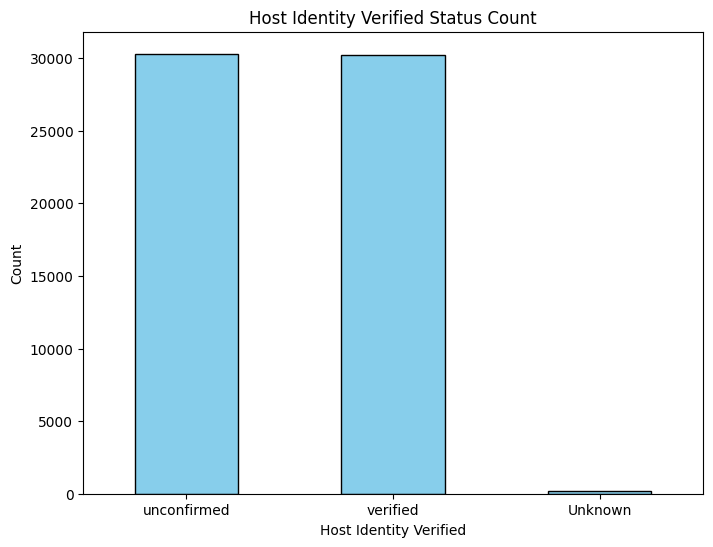

In [72]:
counts = df['host_identity_verified'].value_counts()
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Host Identity Verified Status Count')
plt.xlabel('Host Identity Verified')
plt.ylabel('Count')
plt.xticks(rotation=0)

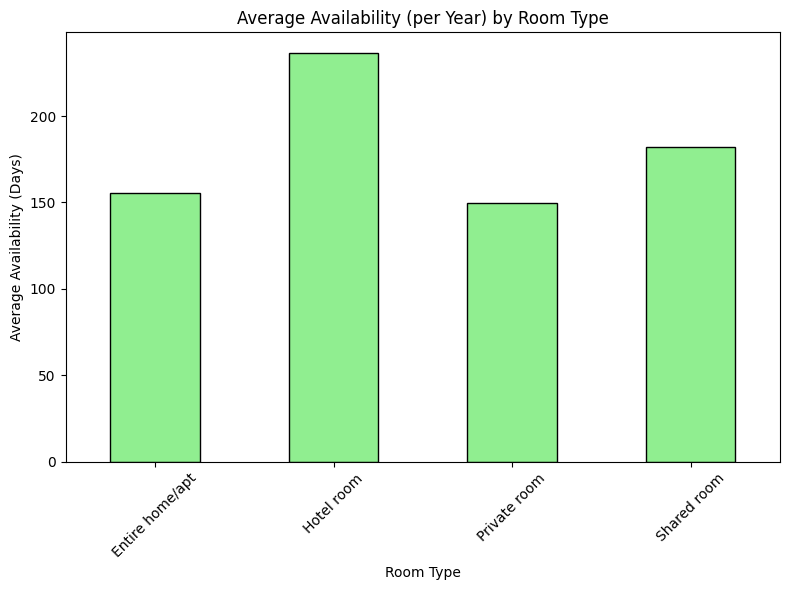

In [73]:
avg_availability = df.groupby('room type')['availability 365'].mean()

plt.figure(figsize=(8, 6))
avg_availability.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Availability (per Year) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Availability (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

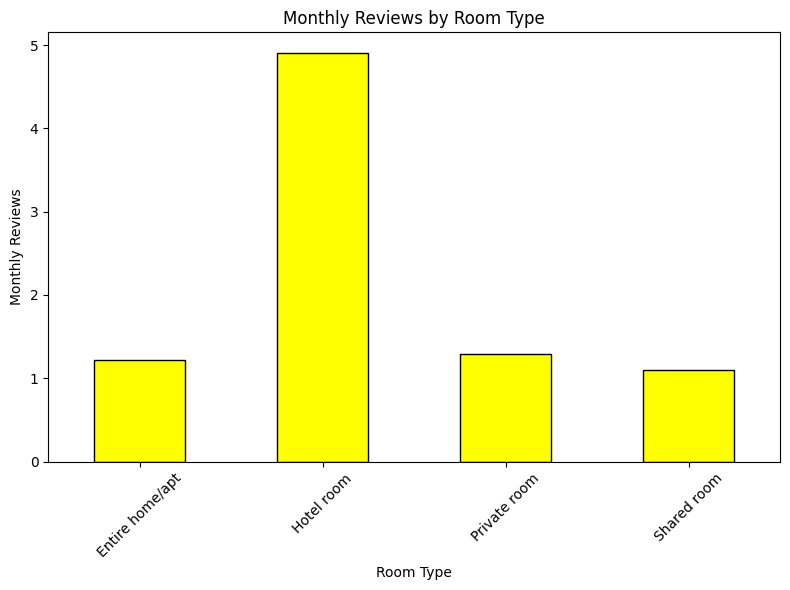

In [74]:
avg_availability = df.groupby('room type')['reviews per month'].mean()

plt.figure(figsize=(8, 6))
avg_availability.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Monthly Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Monthly Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

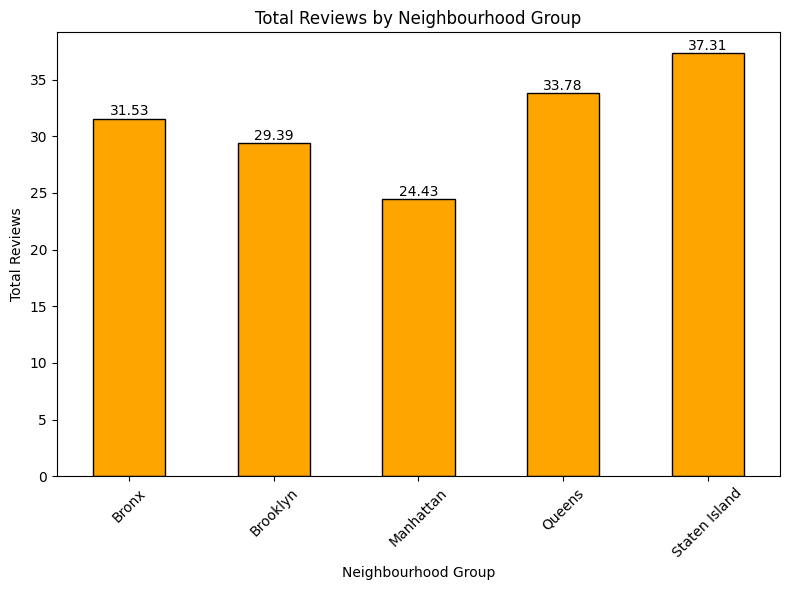

In [77]:
avg_reviews = df.groupby('neighbourhood group')['number of reviews'].mean()

plt.figure(figsize=(8, 6))
ax = avg_reviews.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)

for i, value in enumerate(avg_reviews):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()
